In [1]:
import pandas as pd
import pandas_profiling as pp
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# reading csv 
### and converting data of Cabin 

In [2]:
def cabin(name):
    if name:
        return 1
    else:
        return 0
    
df = pd.read_csv('titanic.csv',converters={'Cabin':cabin})

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

# feature selection
## feature construction

In [5]:
df.drop(columns=['Ticket','Name','PassengerId'],inplace=True)
df['family'] = df['SibSp'] + df['Parch']
df.drop(columns=['SibSp','Parch'],inplace=True)
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family
0,0,3,male,22.0,7.2500,0,S,1
1,1,1,female,38.0,71.2833,1,C,1
2,1,3,female,26.0,7.9250,0,S,0
3,1,1,female,35.0,53.1000,1,S,1
4,0,3,male,35.0,8.0500,0,S,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0,S,0
887,1,1,female,19.0,30.0000,1,S,0
888,0,3,female,NaN,23.4500,0,S,3
889,1,1,male,26.0,30.0000,1,C,0


# data visualization

<AxesSubplot:xlabel='Age', ylabel='Fare'>

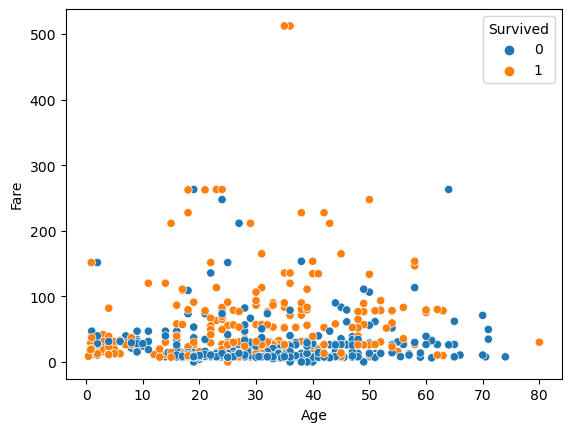

In [6]:
sea.scatterplot(x='Age',y='Fare',data=df,hue='Survived')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

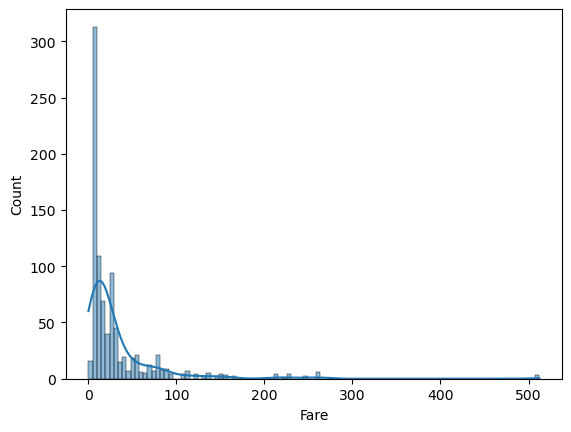

In [7]:
sea.histplot(data=df['Fare'],kde=True)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

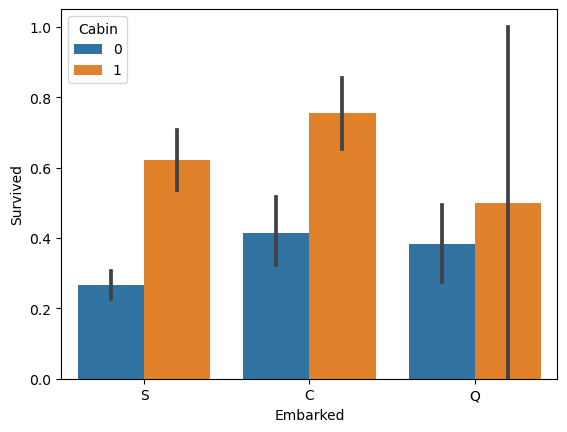

In [8]:
sea.barplot(data=df,x='Embarked',y='Survived',hue='Cabin')

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

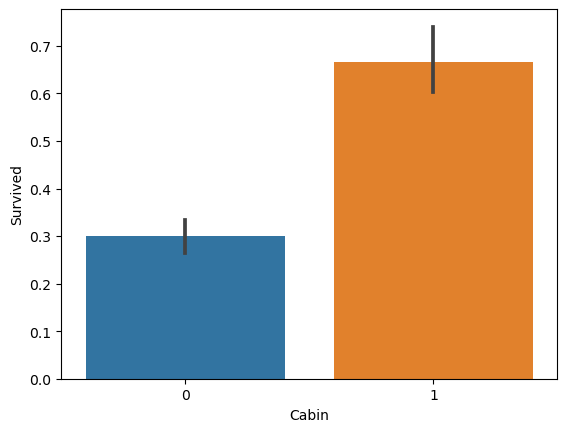

In [9]:
# sea.barplot(data=df,x='Embarked',y='Survived')
sea.barplot(data=df,x='Cabin',y='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

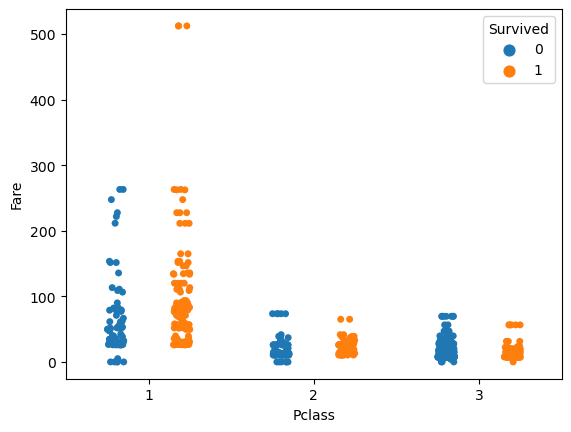

In [10]:
sea.stripplot(x='Pclass',y='Fare',hue='Survived',data=df,dodge=True)

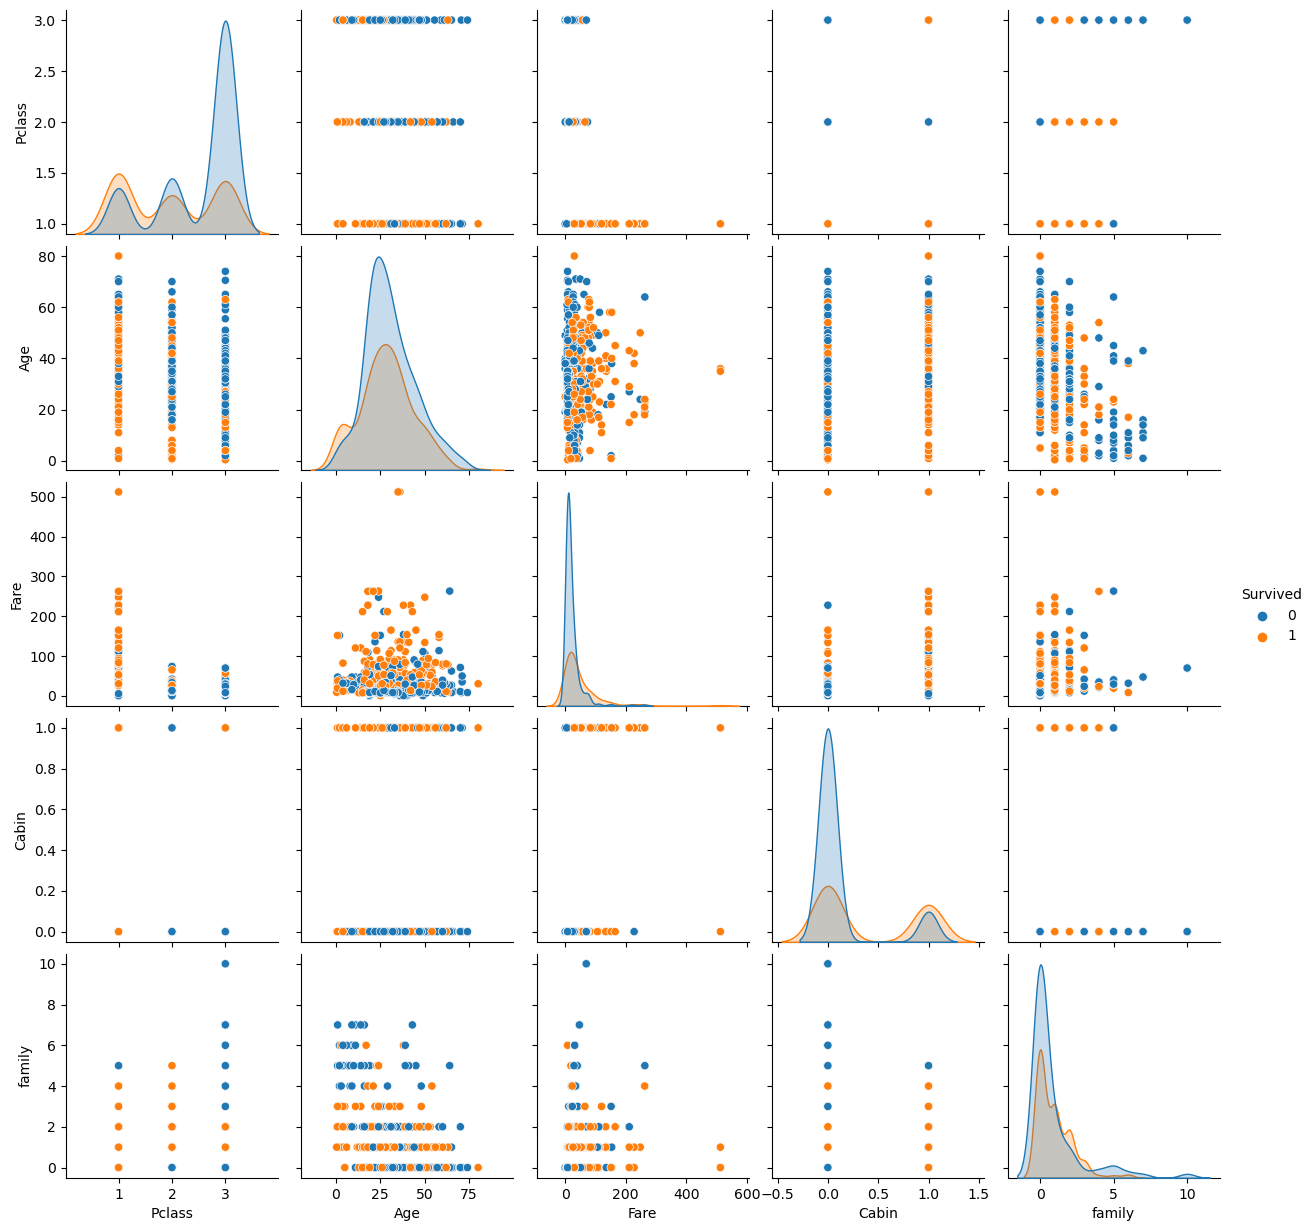

In [11]:
sea.pairplot(df.select_dtypes(['number']),hue='Survived')

# train test split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,1:],df.iloc[:,:1],test_size=0.20)

In [13]:
x_test

,Pclass,Sex,Age,Fare,Cabin,Embarked,family
151,1,female,22.0,66.6000,1,S,1
756,3,male,28.0,7.7958,0,S,0
345,2,female,24.0,13.0000,1,S,0
690,1,male,31.0,57.0000,1,S,1
44,3,female,19.0,7.8792,0,Q,0
...,...,...,...,...,...,...,...
575,3,male,19.0,14.5000,0,S,0
463,2,male,48.0,13.0000,0,S,0
735,3,male,28.5,16.1000,0,S,0
816,3,female,23.0,7.9250,0,S,0


In [14]:
ohe = OneHotEncoder()
a = ohe.fit_transform(x_train[['Embarked']]).toarray()
a

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [15]:
df.Embarked.isnull().sum()

2

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['age']= imputer.fit_transform(df[['Age']])
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family,age
0,0,3,male,22.0,7.2500,0,S,1,22.000000
1,1,1,female,38.0,71.2833,1,C,1,38.000000
2,1,3,female,26.0,7.9250,0,S,0,26.000000
3,1,1,female,35.0,53.1000,1,S,1,35.000000
4,0,3,male,35.0,8.0500,0,S,0,35.000000
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0,S,0,27.000000
887,1,1,female,19.0,30.0000,1,S,0,19.000000
888,0,3,female,NaN,23.4500,0,S,3,29.699118
889,1,1,male,26.0,30.0000,1,C,0,26.000000


<AxesSubplot:ylabel='Count'>

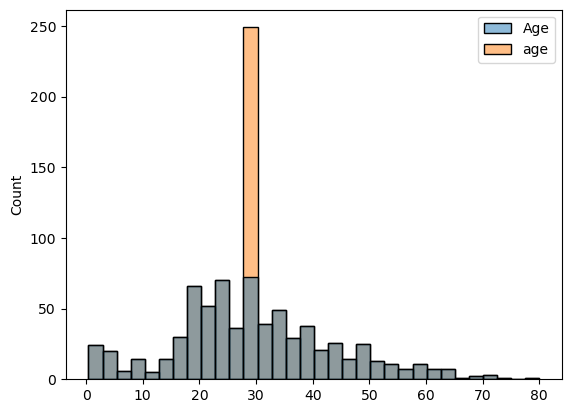

In [17]:
sea.histplot(data=df[['Age','age']])